In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
def d(theta, t, mu_k):
    return 0.5*9.81*(np.sin(theta)-mu_k*np.cos(theta))*t**2

In [130]:
theta1 = np.sin(5.0*np.pi/180.0) # 5 degree 
mu_k1 = 0.02
t1 = np.arange(0, 20.5, 0.5)

In [131]:
np.shape(t1)

(41,)

In [132]:
distance = d(theta1, t1, mu_k1)

In [133]:
random_error = 0.15*np.random.rand()
random_error

0.14906067237951603

In [134]:
pl = np.arange(0.2, 0, -0.004)
np.shape(pl)

(50,)

In [135]:
d1 = []
i = 0
for data in distance:
    d_e = data + data*pl[i]*np.random.rand()
    d1.append(d_e)
    i += 1

In [136]:
t2 = t1**2

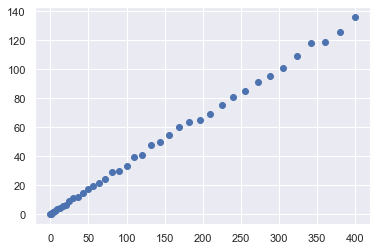

In [137]:
plt.scatter(t2, d1)
plt.show()

In [138]:
t3 = t2.tolist()
uni_acce = pd.DataFrame({"time":t1,"timesq":t3, "distance": d1})
uni_acce.head(3)

,time,timesq,distance
0,0.0,0.00,0.000000
1,0.5,0.25,0.089676
2,1.0,1.00,0.340509


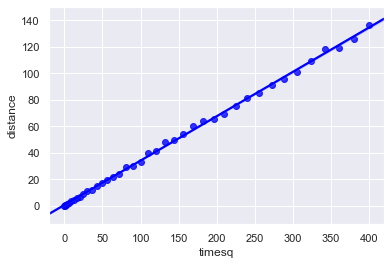

In [139]:
import seaborn as sns; sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
ax = sns.regplot(x="timesq", y="distance", data=uni_acce, order=1, color='blue')

In [140]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [141]:
reg_fit = ols('distance ~ timesq', uni_acce).fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.557e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.37e-59
Time:                        19:13:39   Log-Likelihood:                -70.663
No. Observations:                  41   AIC:                             145.3
Df Residuals:                      39   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6284      0.323      1.944      0.0

In [142]:
type(reg_fit.summary)

method

In [143]:
b = 0.8242
m = 0.3367 

In [144]:
d1 = m*uni_acce['timesq'] + b
uni_acce['d_best_fit'] = d1
uni_acce.head()

,time,timesq,distance,d_best_fit
0,0.0,0.00,0.000000,0.824200
1,0.5,0.25,0.089676,0.908375
2,1.0,1.00,0.340509,1.160900
3,1.5,2.25,0.853246,1.581775
4,2.0,4.00,1.342052,2.171000


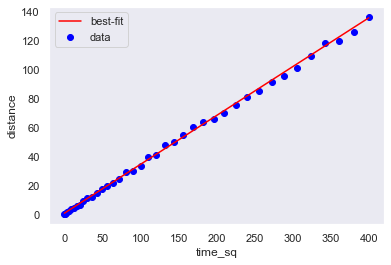

In [151]:
plt.scatter(uni_acce.timesq, uni_acce.distance, color='blue', marker='o', label='data')
plt.plot(uni_acce.timesq, uni_acce.d_best_fit, color='red', label='best-fit')
plt.xlabel('time_sq')
plt.ylabel('distance')
plt.legend()
plt.grid()
plt.show()

In [152]:
uni_acce.to_csv('uniform_acceleration1.csv',header=True, index=False )

In [153]:
m

0.3367

In [154]:
g = 2*m/(np.sin(theta1) - mu_k1*np.cos(theta1))
g

10.032574304711419